# 2.1 - Evaluación Supervisado

### Regresión

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.ensemble import RandomForestRegressor as RFR    # el modelo , el alias es cosa mia

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia

from sklearn.datasets import load_diabetes   # dataset

In [2]:
data=load_diabetes()

In [3]:
data['DESCR'].split('\n')

['.. _diabetes_dataset:',
 '',
 'Diabetes dataset',
 '----------------',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 '**Data Set Characteristics:**',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attribute Information:',
 '      - age     age in years',
 '      - sex',
 '      - bmi     body mass index',
 '      - bp      average blood pressure',
 '      - s1      tc, total serum cholesterol',
 '      - s2      ldl, low-density lipoproteins',
 '      - s3      hdl, high-density lipoproteins',
 '      - s4      tch, total cholesterol / HDL',
 '      - s5    

In [4]:
data.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [5]:
X_train, X_test, y_train, y_test = tts(data['data'], data['target'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [6]:
# modelo

rf=RFR()   # inicia el modelo

rf.fit(X_train, y_train)   # entrena el modelo, lo ajusta

y_pred=rf.predict(X_test)  # prediccion

In [7]:
y_pred[:10]

array([116.06, 195.94, 161.17,  80.42, 132.55, 107.41, 236.9 , 136.41,
       158.99, 193.45])

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [8]:
from sklearn.metrics import mean_squared_error as mse   

mse(y_test, y_pred)

2978.9661954954945

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [9]:
mse(y_test, y_pred, squared=False)

54.57990651783396

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [10]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred, squared=False)

0.43294527051413373

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [11]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae(y_test, y_pred)

43.50801801801803

$$MAE <= RMSE <= MAE · \sqrt{N}$$

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [12]:
rf.score(X_test, y_test)

0.4666135860615933

In [13]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.4666135860615933

### Clasificación

In [14]:
data=pd.read_csv('../data/churn.csv')

data=data.dropna()

y=data.Churn.apply(lambda x: 1 if x=='Yes' else 0)

data=data.drop(columns=['customerID', 'ChurnBinary', 'Churn'])

data=pd.get_dummies(data)

X=data.copy()

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,MonthLevel_Very Low,TotalLevel_High,TotalLevel_Low,TotalLevel_Moderate,TotalLevel_Very High,TotalLevel_Very Low,TenureLevel_Loyal,TenureLevel_New,TenureLevel_Regular,TenureLevel_Very Loyal
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [15]:
X_train, X_test, y_train, y_test = tts(X, y, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 59), (1758, 59), (5274,), (1758,))

In [16]:
from sklearn.linear_model import LogisticRegression as LogReg

logreg=LogReg()

logreg.fit(X_train, y_train)

y_pred_logreg=logreg.predict(X_test)

y_pred_logreg[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred_rfc=rfc.predict(X_test)

y_pred_rfc[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [18]:
logreg.score(X_test, y_test)

0.8077360637087599

In [19]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred_logreg)

0.8077360637087599

In [20]:
rfc.score(X_test, y_test)

0.7804323094425484

In [21]:
acc(y_test, y_pred_rfc)

0.7804323094425484

##### Precision

In [22]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred_logreg)

0.6827195467422096

In [23]:
prec(y_test, y_pred_rfc)

0.6167146974063401

##### Recall

In [24]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_logreg)

0.5160599571734475

In [25]:
rec(y_test, y_pred_rfc)

0.4582441113490364

##### F1_Score

In [26]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_logreg)

0.5878048780487805

In [27]:
f1(y_test, y_pred_rfc)

0.5257985257985258

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [28]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred_logreg)

array([[1179,  112],
       [ 226,  241]])

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

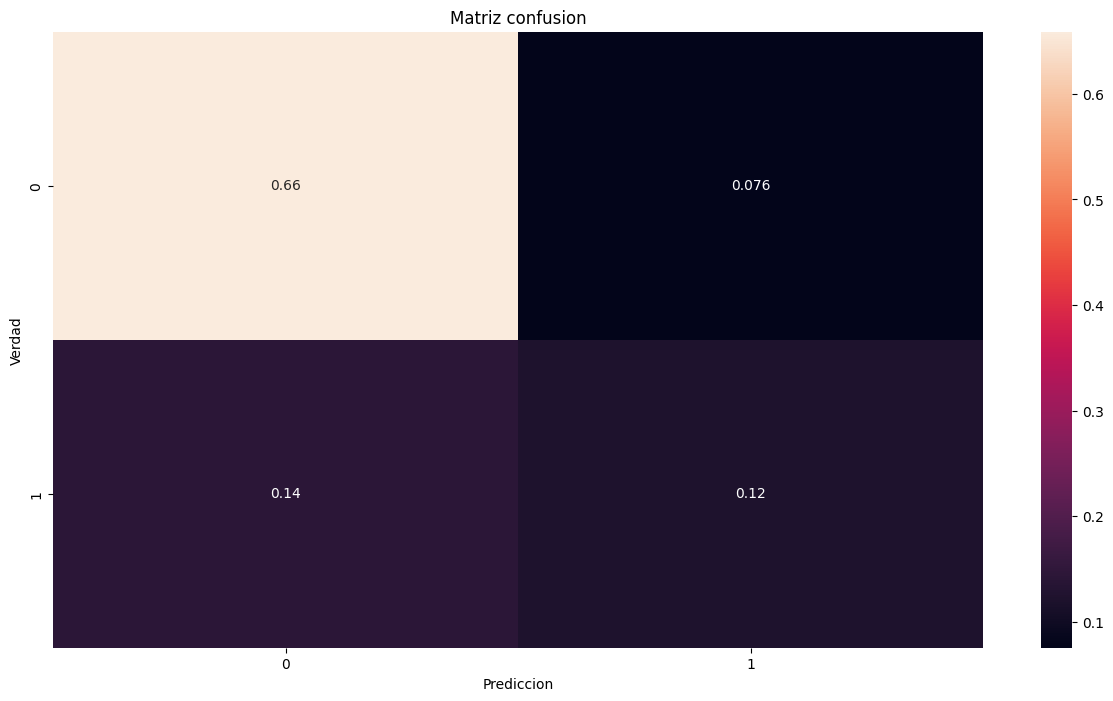

In [31]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_rfc)/sum(sum(cm(y_test, y_pred_rfc))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [32]:
from sklearn.metrics import roc_curve as roc

from sklearn.metrics import roc_auc_score as auc

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

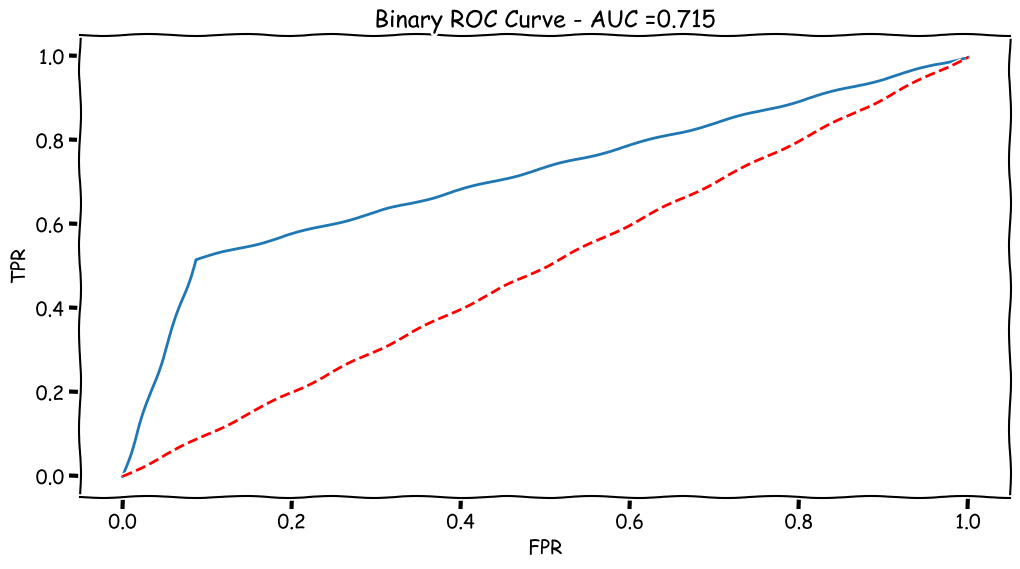

In [34]:
with plt.xkcd():   # mal pintao, y_pred
    
    plt.figure(figsize=(12, 6))
    
    fpr, tpr, _ = roc(y_test, y_pred_logreg)
    
    a=auc(y_test, y_pred_logreg)
    
    plt.plot(fpr, tpr)
    
    plt.plot(fpr, fpr, 'r--')
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    plt.title('Binary ROC Curve - AUC ={:.3f}'.format(a))
    
    plt.show();

In [35]:
y_pred_logreg[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
y_prob_logreg=logreg.predict_proba(X_test)[::, 1]

y_prob_logreg[:10]

array([0.13228023, 0.69070087, 0.66711114, 0.07202255, 0.09436685,
       0.05433668, 0.21929597, 0.37820304, 0.02932099, 0.0306793 ])

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

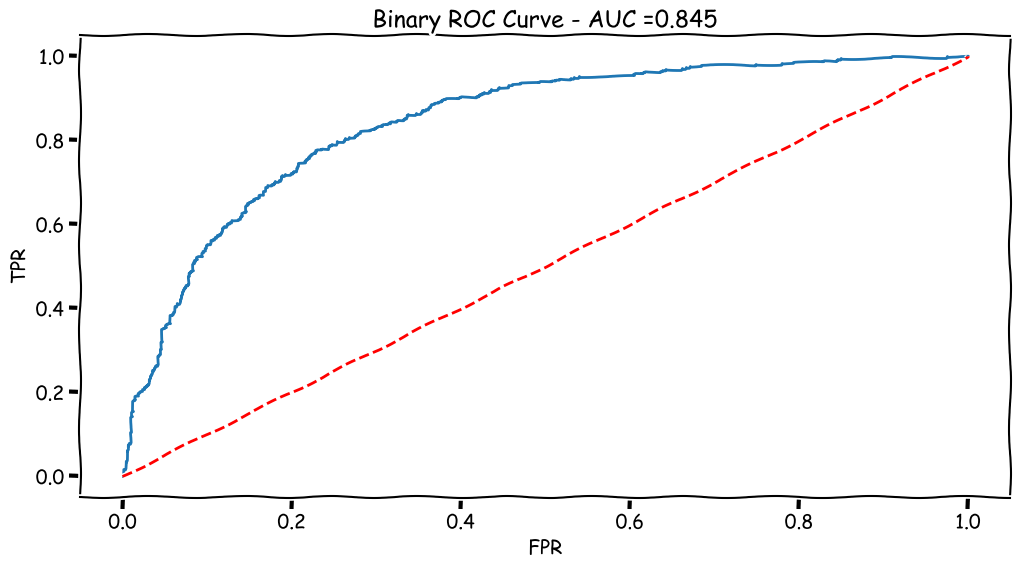

In [40]:
with plt.xkcd():   # mal pintao, y_pred
    
    plt.figure(figsize=(12, 6))
    
    fpr, tpr, _ = roc(y_test, y_prob_logreg)
    
    a=auc(y_test, y_prob_logreg)
    
    plt.plot(fpr, tpr)
    
    plt.plot(fpr, fpr, 'r--')
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    plt.title('Binary ROC Curve - AUC ={:.3f}'.format(a))
    
    plt.show();

**Probabilidad de que tu clasificador sea mejor que un clasificador random - Kappa de Cohen**

https://es.wikipedia.org/wiki/Coeficiente_kappa_de_Cohen

In [41]:
from sklearn.datasets import load_wine

X=load_wine().data

y=load_wine().target

X_train, X_test, y_train, y_test = tts(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [45]:
load_wine()['DESCR'].split('\n')

['.. _wine_dataset:',
 '',
 'Wine recognition dataset',
 '------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 178',
 '    :Number of Attributes: 13 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 ' \t\t- Alcohol',
 ' \t\t- Malic acid',
 ' \t\t- Ash',
 '\t\t- Alcalinity of ash  ',
 ' \t\t- Magnesium',
 '\t\t- Total phenols',
 ' \t\t- Flavanoids',
 ' \t\t- Nonflavanoid phenols',
 ' \t\t- Proanthocyanins',
 '\t\t- Color intensity',
 ' \t\t- Hue',
 ' \t\t- OD280/OD315 of diluted wines',
 ' \t\t- Proline',
 '',
 '    - class:',
 '            - class_0',
 '            - class_1',
 '            - class_2',
 '\t\t',
 '    :Summary Statistics:',
 '    ',
 '    ============================= ==== ===== ======= =====',
 '                                   Min   Max   Mean     SD',
 '    ============================= ==== ===== ======= =====',
 '    Alcohol:                      11.0  14.8    13.0   0.8',
 '    Malic Aci

In [53]:
rfc=RFC()

rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

y_prob=rfc.predict_proba(X_test)

In [47]:
y_pred[:10]

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 1])

In [48]:
y_prob[:10]

array([[0.  , 0.06, 0.94],
       [0.02, 0.14, 0.84],
       [0.98, 0.02, 0.  ],
       [0.  , 0.12, 0.88],
       [1.  , 0.  , 0.  ],
       [0.06, 0.31, 0.63],
       [0.79, 0.19, 0.02],
       [0.  , 0.09, 0.91],
       [0.89, 0.07, 0.04],
       [0.01, 0.99, 0.  ]])

In [49]:
%pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.


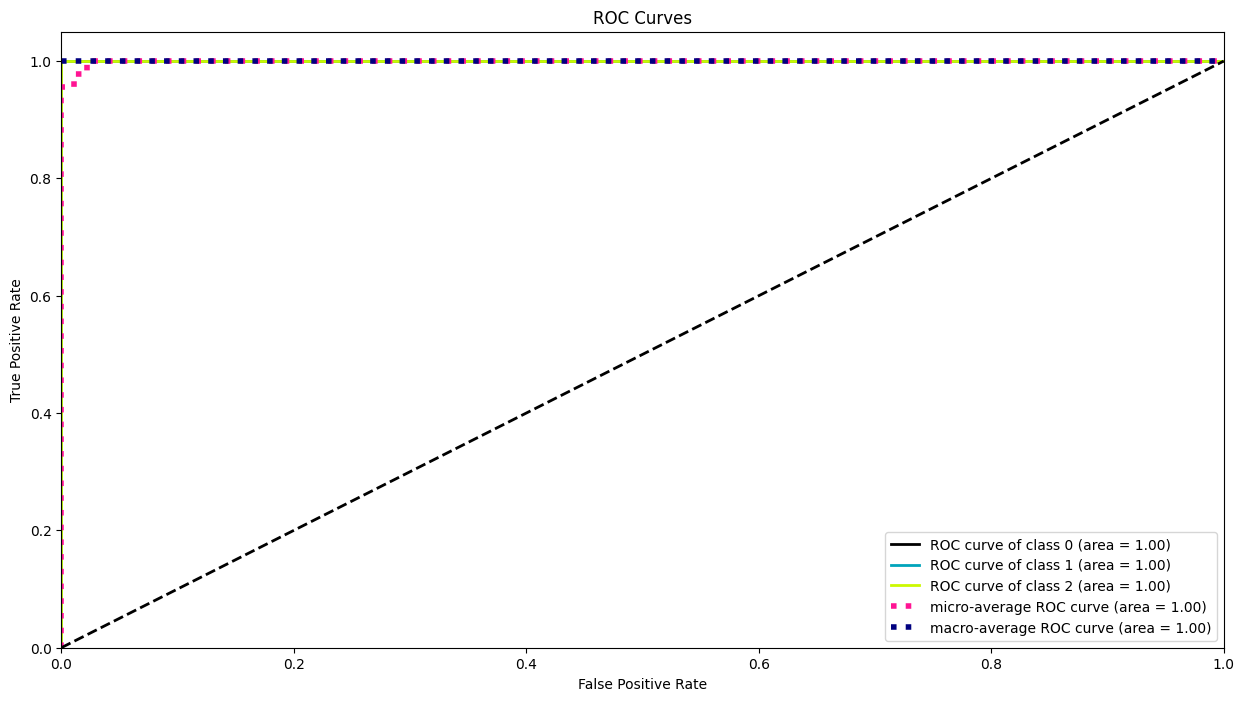

In [54]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_prob, figsize=(15, 8));

In [55]:
from sklearn.svm import SVC

svc=SVC(probability=True)

svc.fit(X_train, y_train)

y_prob=svc.predict_proba(X_test)

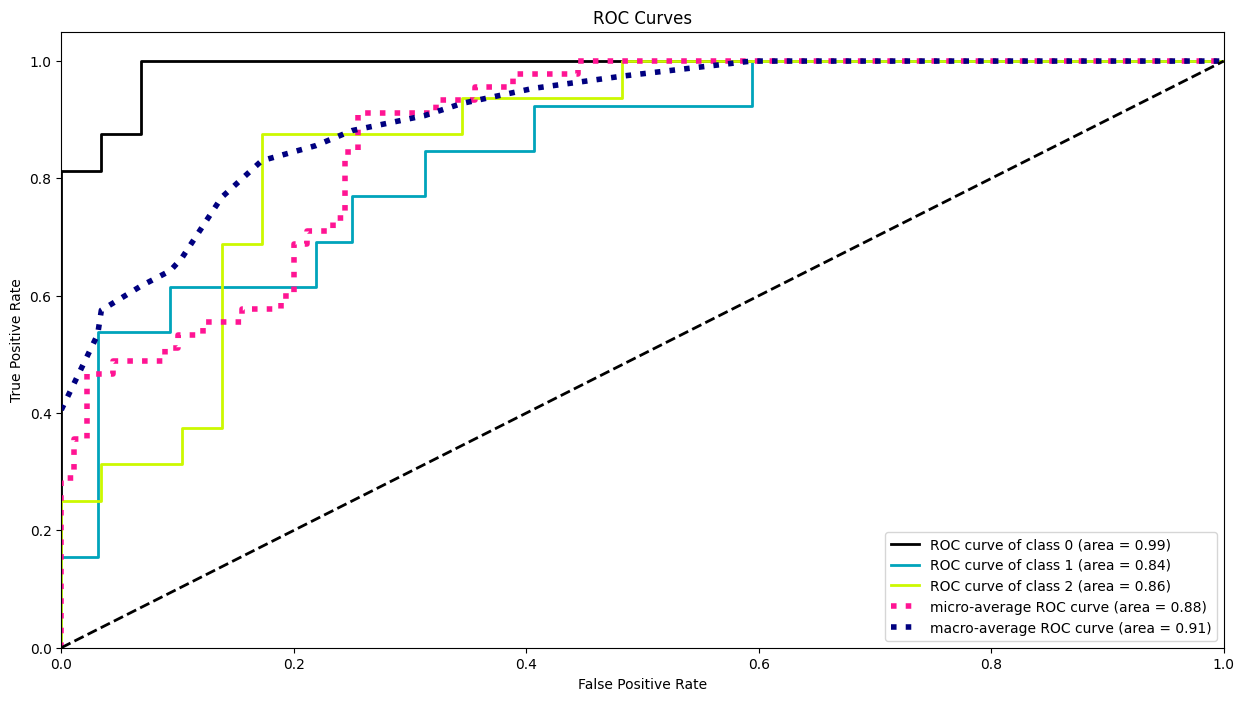

In [56]:
skplt.metrics.plot_roc(y_test, y_prob, figsize=(15, 8));